In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import data_util as du
import performance_util as pu
import bayes_classifier as bayes
import knn_classifier as knn

from PCA import PCA
import kmeans

%matplotlib inline

In [2]:
data_dir = '../data/fashion_mnist/'
random_seed = 1
np.set_printoptions(precision=4)

In [3]:
X_train, Y_train = du.load_fashion_mnist(data_dir + 'train')
X_test, Y_test = du.load_fashion_mnist(data_dir + 't10k')

X_train = du.normalize2(X_train)
X_test = du.normalize2(X_test)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


# Visualization of One Image

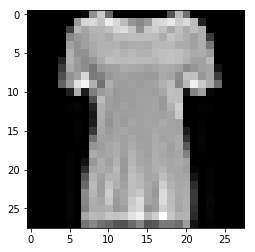

In [4]:
plt.imshow(np.reshape(X_train[10], (-1, 28)))
plt.gray()

# PCA (n_components = 50)

In [ ]:
pca = PCA(n_components=50)
pca.fit(X_train)

X_train_reduced_1 = pca.transform(X_train)
X_test_reduced_1 = pca.transform(X_test)

print(np.sum(pca.explained_variance_ratio_))

print(X_train_reduced_1.shape)
print(X_test_reduced_1.shape)

### BAYES CLASSIFIER

In [ ]:
parameters = [1, 0.001, 10, X_train_reduced_1.shape[1], 0.0001, False]

model = bayes.bayes_classifier(estimator_type = 'GMM', param = parameters)
model.train(X_train_reduced_1, Y_train)

In [ ]:
Y_pred = model.predict(X_test_reduced_1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

# PCA (n_components = 25)

In [ ]:
pca = PCA(n_components=25)
pca.fit(X_train)

X_train_reduced_1 = pca.transform(X_train)
X_test_reduced_1 = pca.transform(X_test)

print(X_train_reduced_1.shape)
print(X_test_reduced_1.shape)

### BAYES CLASSIFIER

#### Parzen Window

In [ ]:
dimension = X_train_reduced_1.shape[1]

parzen_parameters = [['hypercube', 0.1, dimension, True], ['hypercube', 0.25, dimension, True],
                     ['hypercube', 0.5, dimension, True],  ['gaussian', 0.1, dimension, True],
                     ['gaussian', 0.25, dimension, True],  ['gaussian', 0.5, dimension, True]]
    
for par in parzen_parameters:
    model = bayes.bayes_classifier(estimator_type = 'Parzen', param = par)
    model.train(X_train_reduced_1, Y_train)
    Y_pred = model.predict(X_test_reduced_1)
    
    print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_test))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_test, 10))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_test, 10))
    
    print()
    print()


# Unsupervised Learning
## K-Means Classifier 

### (n-clusters = 10)

In [ ]:
model = kmeans.kmeans(10, 100, random_seed = 13)
model.train(X_train_reduced_1)

### Testing

In [ ]:
Y_pred = np.expand_dims(model.predict(X_test_reduced_1), axis = 1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

### (n-clusters = 20)

In [ ]:
model = kmeans.kmeans(20, 100, random_seed = 1)
model.train(X_train_reduced_1)

### Testing

In [ ]:
Y_pred = np.expand_dims(model.predict(X_test_reduced_1), axis = 1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

# PCA (n_components = 5)

In [ ]:
pca = PCA(n_components=5)
pca.fit(X_train)

#print(np.sum(pca.explained_variance_ratio_))

X_train_reduced_1 = pca.transform(X_train)
X_test_reduced_1 = pca.transform(X_test)

# Print reduced image
# plt.imshow(np.reshape(X_train_reduced_1[10], (-1, 7)))
# plt.gray()

print(X_train_reduced_1.shape)
print(X_test_reduced_1.shape)

### BAYES CLASSIFIER

#### Parzen Window

In [ ]:
dimension = X_train_reduced_1.shape[1]

parzen_parameters = [['hypercube', 0.1, dimension, True], ['hypercube', 0.25, dimension, True],
                     ['hypercube', 0.5, dimension, True],  ['gaussian', 0.1, dimension, True],
                     ['gaussian', 0.25, dimension, True],  ['gaussian', 0.5, dimension, True]]
    
for par in parzen_parameters:
    model = bayes.bayes_classifier(estimator_type = 'Parzen', param = par)
    model.train(X_train_reduced_1, Y_train)
    Y_pred = model.predict(X_test_reduced_1)
    
    print("Accuracy on Dev Set = ", pu.model_accuracy(Y_pred, Y_test))
    print("Precision per Class")
    print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
    print("Recall per Class")
    print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
    print("F1 Score per Class")
    print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
    print("Macro Average Precision, Recall and F1 Score")
    print(pu.model_macro_average(Y_pred, Y_test, 10))
    print("Micro Average Precision, Recall and F1 Score")
    print(pu.model_micro_average(Y_pred, Y_test, 10))
    
    print()
    print()


# Unsupervised Learning
## K-Means Classifier 

### (n-clusters = 10)

In [ ]:
model = kmeans.kmeans(10, 100, random_seed = 1)
model.train(X_train_reduced_1)

### Testing

In [ ]:
Y_pred = np.expand_dims(model.predict(X_test_reduced_1), axis = 1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()

### (n-clusters = 20)

In [ ]:
model = kmeans.kmeans(20, 100, random_seed = 1)
model.train(X_train_reduced_1)

### Testing

In [ ]:
Y_pred = np.expand_dims(model.predict(X_test_reduced_1), axis = 1)

print("Accuracy on Test Set = ", pu.model_accuracy(Y_pred, Y_test))
print("Precision per Class")
print(pu.model_precision(Y_pred, Y_test, 10).T[0, :])
print("Recall per Class")
print(pu.model_recall(Y_pred, Y_test, 10).T[0, :])
print("F1 Score per Class")
print(pu.model_f1(Y_pred, Y_test, 10).T[0, :])
print("Macro Average Precision, Recall and F1 Score")
print(pu.model_macro_average(Y_pred, Y_test, 10))
print("Micro Average Precision, Recall and F1 Score")
print(pu.model_micro_average(Y_pred, Y_test, 10))

print()
print()